In [6]:
%pylab inline
%load_ext autoreload
%autoreload 2

from jupyterthemes import jtplot
jtplot.style()

Populating the interactive namespace from numpy and matplotlib


In [3]:
import os, sys, time
import cPickle as pickle
sys.path.append('../EXP/')
import ClevelandMcGill as C
reload(C)

<module 'ClevelandMcGill' from '../EXP/ClevelandMcGill/__init__.pyc'>

In [83]:
data, labels, parameters = C.Figure12.generate_datapoint()
print 'Data', data
print 'Labels', labels
print 'Parameters', parameters

Data [20, 11, 54, 60, 25, 56]
Labels [54, 56]
Parameters 57600


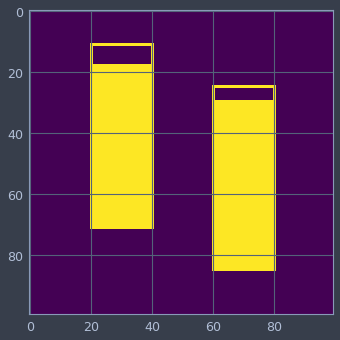

In [84]:
imshow(C.Figure12.data_to_image(data))

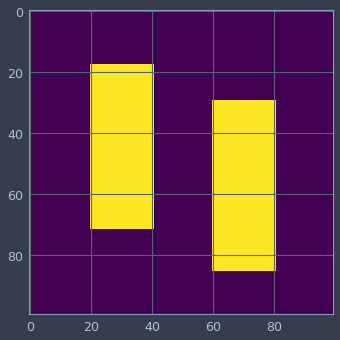

In [85]:
imshow(C.Figure12.data_to_image(data, framed=False))

In [ ]:
#
# create many
#

#
#
# DATA GENERATION
#
#
def in_array(haystack, needle):
  for h in haystack:
    if np.array_equal(needle, h):
      return True
  return False

train_target = 60000
val_target = 20000
test_target = 20000


# get global min and max
global_min = np.inf
global_max = -np.inf
for N in range(train_target+val_target+test_target):
  
  sparse, image, label, parameters = C.Figure12.generate_datapoint()
  
  global_min = min(label, global_min)
  global_max = max(label, global_max)
# end of global min max


X_train = np.zeros((train_target, 100, 100), dtype=np.float32)
y_train = np.zeros((train_target, 5), dtype=np.float32)
train_counter = 0

X_val = np.zeros((val_target, 100, 100), dtype=np.float32)
y_val = np.zeros((val_target, 5), dtype=np.float32)
val_counter = 0

X_test = np.zeros((test_target, 100, 100), dtype=np.float32)
y_test = np.zeros((test_target, 5), dtype=np.float32)
test_counter = 0

t0 = time.time()

all_counter = 0
while train_counter < train_target or val_counter < val_target or test_counter < test_target:
  
  all_counter += 1
  
  data, label, parameters = C.Figure12.generate_datapoint()
  
  

  
  
  pot = np.random.choice(3)

  if pot == 0 and train_counter < train_target:
    # a training candidate
    if in_array(y_val, label) or in_array(y_test, label):
      # no thank you
      continue
      
    #
    image = DATATYPE(data)
    image = image.astype(np.float32)
      
    # add noise?
    if NOISE:
      image += np.random.uniform(0, 0.05,(100,100))
      
    # safe to add to training
    X_train[train_counter] = image
    y_train[train_counter] = label
    train_counter += 1
    
  elif pot == 1 and val_counter < val_target:
    # a validation candidate
    if in_array(y_test, label) or in_array(y_train, label):
      # no thank you
      continue
      
    #
    image = DATATYPE(data)
    image = image.astype(np.float32)
      
    # add noise?
    if NOISE:
      image += np.random.uniform(0, 0.05,(100,100))
      
    # safe to add to validation
    X_val[val_counter] = image
    y_val[val_counter] = label
    val_counter += 1
  
  elif pot == 2 and test_counter < test_target:
    # a test candidate
    if in_array(y_val, label) or in_array(y_train, label):
      # no thank you
      continue
      
    #
    image = DATATYPE(data)
    image = image.astype(np.float32)
      
    # add noise?
    if NOISE:
      image += np.random.uniform(0, 0.05,(100,100))
      
    # safe to add to test
    X_test[test_counter] = image
    y_test[test_counter] = label
    test_counter += 1
  
  
  
print 'Done', time.time()-t0, 'seconds (', all_counter, 'iterations)'
#
#
#